# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Get OpenWeatherMap API Key

api_key = weather_api_key

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# print(query_url)

# Create lists to hold various weather data
city_name = []
temps = []
lats = []
humid = []
cloudy = []
wind = []
country = []

# Create counter for city number
city_num = 1

# Print statement for beginning of loop/log
print(f'Starting Loop of Cities')
print(f'-----------------------------------')

# Create loop to go through cities in the city list (cities)
for city in cities:
    
    # Using try in event data in CityPy not available in OpenWeatherMap
    try:
        response = requests.get(f'{query_url}&q={city}').json()
        
        # Append weather data to empty lists
        city_name.append(response['name'])
        temps.append(response['main']['temp_max'])
        lats.append(response['coord']['lat'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])

        print(f'Processing {city_num}, {city}:')
        print(f'{query_url}&q={city}')

        # Add 1 to the city number as the loop progresses
        city_num = city_num + 1

        # Use timesleep (1 second pause) to not exceed API rate limit
        # Time sleep reference https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/
        time.sleep(1)
    
    # If the city is not found
    except:
        print('City not available.')
    continue

/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=markova
Processing 411, teguldet:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=teguldet
Processing 412, christchurch:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=christchurch
Processing 413, puerto madryn:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=puerto madryn
Processing 414, indramayu:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=indramayu
Processing 415, guangyuan:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=guangyuan
Processing 416, montepuez:
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3ce857d9d3cfb3cc1a8d809412d6f31&q=montepuez
Processing 417, shache:
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Put lists of weather data into dictionary for converting to Data Frame
weather_dict = {
    "City": city_name,
    "Country": country,
    "High Temp (F)": temps,
    "Cloudiness (%)": cloudy,
    "Humidity (%)": humid,
    "Wind (mph)": wind,
    "Latitude": lats
}

# Create DataFrame from dictionary
weather_df = pd.DataFrame(weather_dict)
# weather_df.count() - there are 578 cities in the dataset

# Print DataFrame to csv
weather_df.to_csv('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/cities.csv')

# Display DataFrame
weather_df.head()

,City,Country,High Temp (F),Cloudiness (%),Humidity (%),Wind (mph),Latitude
0,Nagua,DO,86.00,20,70,9.22,19.3832
1,Khorinsk,RU,29.61,100,52,4.50,52.1657
2,Kavieng,PG,79.48,100,81,6.11,-2.5744
3,Durusu,TR,60.80,0,72,2.30,41.3053
4,Bay Roberts,CA,45.00,100,100,5.99,47.5999


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get max value of humidity to test for cities with humidity > 100%

humid_max = weather_df['Humidity (%)'].max()
print(humid_max)
# there are no cities with humidity > 100%

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

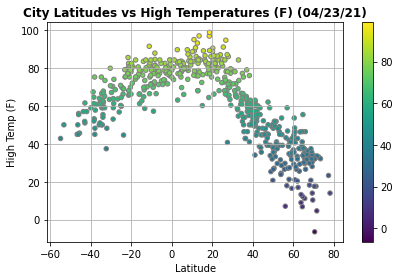

In [8]:
# Build scatter plot for Latitudes vs. Temperatures

# set x and y values, set value for colormap
# colormap reference https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
x = weather_df['Latitude']
y = weather_df['High Temp (F)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='viridis', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs High Temperatures (F) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('High Temp (F)')
plt.grid(True)
plt.colorbar()

# save to image file - saving as a .jpg so I don't have to deal with the whitespace issue (.png files will save with transparent bg)
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Temp_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

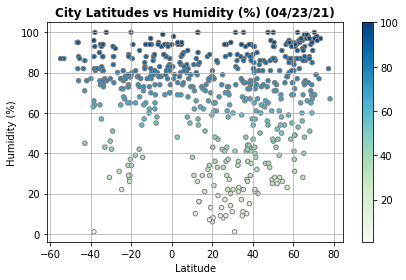

In [9]:
# Build scatter plot for Latitudes vs. Humidity

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Humidity (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='GnBu', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Humidity (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Humid_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

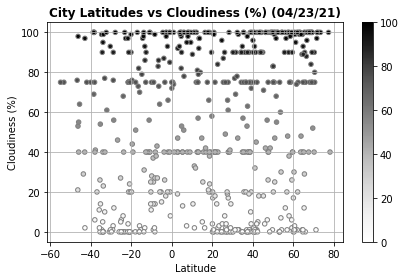

In [10]:
# Build scatter plot for Latitudes vs. Cloudiness

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Cloudiness (%)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='Greys', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Cloudiness (%) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Cloud_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

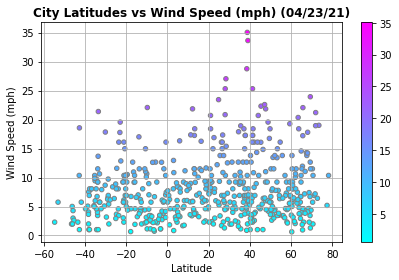

In [12]:
# Build scatter plot for Latitudes vs. Wind Speed

# set x and y values, set value for colormap
x = weather_df['Latitude']
y = weather_df['Wind (mph)']
t = y

# chart the scatter plot
plt.scatter(x, y, c=t, marker='o', s=20, cmap='cool', edgecolor='grey')

# print chart and axis titles
plt.title ('City Latitudes vs Wind Speed (mph) (04/23/21)', weight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.colorbar()

# save to image file
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/Wind_v_Lat.jpg')

# show the chart
plt.tight_layout()
plt.show()

## Linear Regression

In [18]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
northern_df = weather_df.loc[(weather_df['Latitude']>=0)]
southern_df = weather_df.loc[(weather_df['Latitude']<0)]

# build function to run all regression plots
def regress_plots(x_values, y_values, data_point, label_loc):
    
    # add regression line and equation to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # define the plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, label_loc, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(data_point)
    print(f'The r-value is: {rvalue**2}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7861539429665083


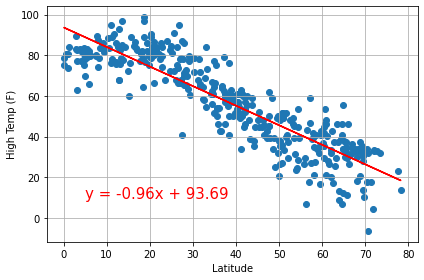

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northern_df['Latitude']
y_values = northern_df['High Temp (F)']
regress_plots(x_values, y_values, 'High Temp (F)', (5,10))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Temp_v_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5581986129322385


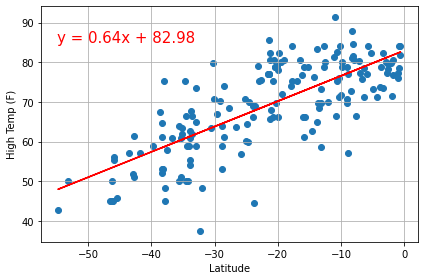

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = southern_df['Latitude']
y_values = southern_df['High Temp (F)']
regress_plots(x_values, y_values, 'High Temp (F)', (-55,85))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Temp_v_Lat.jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.027309312767181668


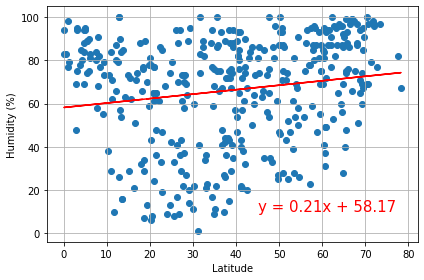

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
regress_plots(x_values, y_values, 'Humidity (%)', (45,10))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Humid_v_Lat.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00051891666000013


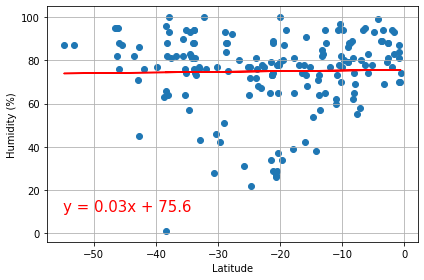

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
regress_plots(x_values, y_values, 'Humidity (%)', (-55,10))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Humid_v_Lat.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.011723490583396631


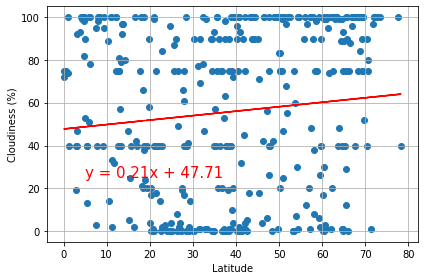

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
regress_plots(x_values, y_values, 'Cloudiness (%)', (5,25))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Clouds_v_Lat.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0001133474911653744


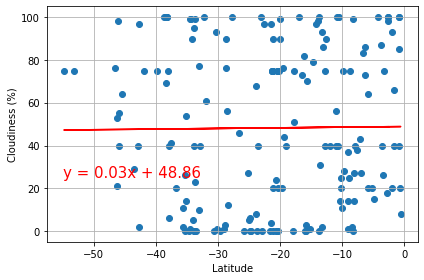

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
regress_plots(x_values, y_values, 'Cloudiness (%)', (-55,25))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Clouds_v_Lat.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0019298856257428097


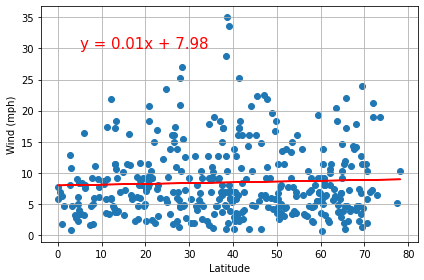

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind (mph)']
regress_plots(x_values, y_values, 'Wind (mph)', (5,30))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/North_Wind_v_Lat.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 7.314695967186665e-05


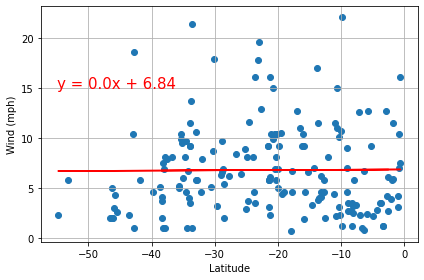

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind (mph)']
regress_plots(x_values, y_values, 'Wind (mph)', (-55,15))
plt.savefig('/Users/amber/Desktop/GitHub/python-api-challenge/output_data/South_Wind_v_Lat.jpg')